In [30]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import psycopg2 as pg
%matplotlib inline

In [31]:
conn = pg.connect(dbname = "postgres", host="db.dssg.io", user='kyang', password = 'postgresis19')

In [32]:
script = "select * from IEFP.applications;"

In [33]:
results_df = pd.read_sql(script, con=conn)

In [34]:
results_df.head()

,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,ddeficiencia,cnacionalidade,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1058797,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,29,None,NaN,None,NaN,NaN,None,0.0,NaN,None
1,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1062047,F,6,6 ANOS,0,NÃO DEFICIENTE,PT,...,46,None,NaN,None,NaN,NaN,None,1.0,NaN,None
2,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1080395,F,6,6 ANOS,21,DEFICIÊNCIAS DA MEMÓRIA,PT,...,31,None,NaN,None,NaN,NaN,None,1.0,NaN,None
3,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1194683,F,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,34,None,NaN,None,NaN,NaN,None,0.0,NaN,None
4,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1199775,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,26,None,NaN,None,NaN,NaN,None,0.0,NaN,None


In [35]:
results_df.columns

Index([u'anomes', u'ctipo_movimento', u'dtipo_movimento', u'ute_id', u'sexo',
       u'chabilitacao_escolar', u'dhabilitacao_escolar', u'cdeficiencia',
       u'ddeficiencia', u'cnacionalidade', u'dnacionalidade',
       u'cnp_pretendida', u'dcnp_pretendida', u'cpp_pretendida',
       u'dcpp_pretendida', u'candidatura_data', u'ccategoria', u'dcategoria',
       u'candidatura_motivo_inscricao', u'candidatura_rinsc',
       u'ute_estado_civil', u'candidatura_int_tempo_nao_insc',
       u'candidatura_prof_pret_tempo_pratica',
       u'sit_anterior_prof_tempo_pratica', u'candidatura_local_trabalho',
       u'ute_plano_emprego', u'ute_plano_emprego_anterior',
       u'candidatura_carteira_prof', u'candidatura_formacao_prof',
       u'candidatura_qualificacao', u'reinscricao_ult_saida_data',
       u'reinscricao_ult_saida_motivo', u'carea_formacao_tabela_em_activo',
       u'darea_formacao_tabela_em_activo', u'carea_curso_tabela_em_activo',
       u'darea_curso_tabela_em_activo', u'colocacao

In [36]:
# define function to print multiple histograms

def print_histograms (df):
    for x in df.columns:
        plt.figure()
        getattr(df,x).value_counts(dropna=False).plot(kind='bar', title=x)

In [ ]:
# add column names to the list to see histogram

print_histograms(results_df[['candidatura_categoria_anterior','candidatura_estado_anteria']])

(array([   45.,  1040.,     0.,    44.,     0.,    12.,    86.,     0.,
            0.,    19.]),
 array([ 1. ,  1.6,  2.2,  2.8,  3.4,  4. ,  4.6,  5.2,  5.8,  6.4,  7. ]),
 <a list of 10 Patch objects>)

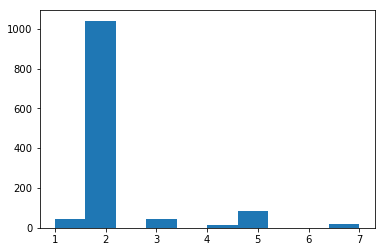

In [38]:
plt.hist(results_df['conjuge_categoria'].dropna(),bins=10)

In [39]:
DataFrame(results_df.groupby(['ccategoria','dcategoria', 'candidatura_categoria_anterior']).ute_id.count())

ute_id
ccategoria dcategoria                candidatura_categoria_anterior        
1          DESEMPREGADO-1º EMPREGO   1.0                               2376
                                     5.0                                  1
2          DESEMPREGADO-NOVO EMPREGO 1.0                               2771
                                     2.0                              37079
                                     3.0                               5782
                                     4.0                                393
3          EMPREGADO                 1.0                                 94
                                     2.0                                580
                                     3.0                                372
                                     4.0                                 24
4          EMPREGADO A TEMPO PARCIAL 1.0                                 10
                                     2.0                                193
                                     3.0                                 34
                                     4.0                                 42

In [40]:
#plt.hist2d(results_df['ute_plano_emprego'], results_df['ute_plano_emprego_anterior'],)

In [41]:
#results_df.groupby('sit_anterior_prof_tempo_pratica').ute_id.count()

In [42]:
results_df[results_df['dregime_contrato_pretendido'].notnull()]

,anomes,ctipo_movimento,dtipo_movimento,ute_id,sexo,chabilitacao_escolar,dhabilitacao_escolar,cdeficiencia,ddeficiencia,cnacionalidade,...,ute_idade,conjuge_estado_civil,conjuge_categoria,conjuge_estado,conjuge_motivo_indisponibilidade,candidatura_categoria_anterior,candidatura_estado_anterior,ute_nr_pessoas_cargo,ute_nr_descendentes_cargo,candidatura_data_ppe
0,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1058797,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,29,None,NaN,None,NaN,NaN,None,0.0,NaN,None
1,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1062047,F,6,6 ANOS,0,NÃO DEFICIENTE,PT,...,46,None,NaN,None,NaN,NaN,None,1.0,NaN,None
2,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1080395,F,6,6 ANOS,21,DEFICIÊNCIAS DA MEMÓRIA,PT,...,31,None,NaN,None,NaN,NaN,None,1.0,NaN,None
3,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1194683,F,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,34,None,NaN,None,NaN,NaN,None,0.0,NaN,None
4,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1199775,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,26,None,NaN,None,NaN,NaN,None,0.0,NaN,None
5,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,123833,F,12,12 ANOS,0,NÃO DEFICIENTE,PT,...,33,None,NaN,None,NaN,NaN,None,1.0,NaN,None
6,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,131357,F,6,6 ANOS,0,NÃO DEFICIENTE,PT,...,47,None,NaN,None,NaN,NaN,None,2.0,NaN,None
7,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,135175,M,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,32,None,NaN,None,NaN,NaN,None,0.0,NaN,None
8,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1356771,F,9,9 ANOS,0,NÃO DEFICIENTE,PT,...,27,None,NaN,None,NaN,NaN,None,0.0,NaN,None
9,200701,11,PEDIDOS DE EMPREGO AO LONGO DO MÊS,1396437,M,LC,LICENCIATURA,0,NÃO DEFICIENTE,PT,...,30,None,NaN,None,NaN,NaN,None,0.0,NaN,None
